In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
#import check_util.checker as checker

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))
device = "cuda" if torch.cuda.is_available() else "cpu"   # GPU 사용 가능 여부에 따라 device 정보 저장

pytorch version: 1.11.0+cu113
GPU 사용 가능 여부: True


In [3]:
# 하이퍼파라미터 세팅
batch_size = 100
num_epochs = 5
learning_rate = 1e-3

In [4]:
from torch.utils.data import DataLoader

root = './data'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.FashionMNIST(root=root, 
                               train=True, 
                               transform=transform, 
                               download=True)
test_data = dset.FashionMNIST(root=root, 
                              train=False, 
                              transform=transform, 
                              download=True)

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           drop_last = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size = batch_size,
                                          shuffle = False,
                                          drop_last = True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



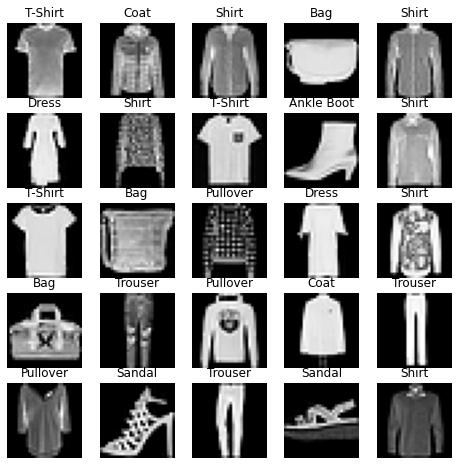

In [6]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy() # numpy()를 통해 torch Tensor를 numpy array로 변환
    label = labels_map[train_data[data_idx][1]] # item()을 통해 torch Tensor를 숫자로 변환
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
class DNN(nn.Module):
  
  def __init__(self, num_classes=10):
    super(DNN, self).__init__()
    self.layer1 = nn.Sequential(
        
        nn.Linear(28 * 28, 512, bias = True),
        nn.BatchNorm1d(512),
        nn.ReLU()

    )
    self.layer2 = nn.Sequential(
        
        nn.Linear(512, 10, bias = True)
    
    )
  
  def forward(self, x):
    x = x.view(x.size(0), -1)
    x_out = self.layer1(x)
    x_out = self.layer2(x_out)
    return x_out

In [8]:
def weights_init(m):
    if isinstance(m, nn.Linear): # 모델의 모든 MLP 레이어에 대해서
        nn.init.xavier_normal_(m.weight) # Weight를 xavier_normal로 초기화
        print(m.weight)

In [9]:
torch.manual_seed(7777) # 일관된 weight initialization을 위한 random seed 설정
model = DNN().to(device)
model.apply(weights_init) # 모델에 weight_init 함수를 적용하여 weight를 초기화

Parameter containing:
tensor([[-0.0113, -0.0095, -0.0257,  ..., -0.0324,  0.0534, -0.0091],
        [-0.0407,  0.0350, -0.0196,  ..., -0.0266,  0.0307,  0.0381],
        [-0.0205,  0.0367,  0.0094,  ..., -0.0310, -0.0451,  0.0051],
        ...,
        [-0.0171, -0.0556,  0.0795,  ...,  0.0271, -0.0003,  0.0115],
        [ 0.0306, -0.0265,  0.0463,  ..., -0.0811, -0.0674, -0.1098],
        [-0.0386, -0.0181, -0.0253,  ...,  0.0392,  0.0206,  0.0373]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0727, -0.0666,  0.0895,  ...,  0.0421, -0.0129,  0.0166],
        [-0.0124, -0.0479, -0.0066,  ..., -0.1160, -0.0235,  0.0173],
        [ 0.0334,  0.1150,  0.0316,  ...,  0.0315, -0.0283,  0.0292],
        ...,
        [ 0.1091,  0.0800,  0.0075,  ..., -0.0202,  0.0197, -0.0985],
        [-0.0881, -0.0652,  0.0022,  ..., -0.0273, -0.0202, -0.0695],
        [ 0.1490, -0.1105,  0.0397,  ...,  0.0355, -0.0187,  0.0107]],
       device='cuda:0', requires_grad=True)


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [10]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [11]:
for epoch in range(num_epochs):
  for i, (imgs, labels) in enumerate(train_loader):
    imgs, labels = imgs.to(device), labels.to(device)

    outputs = model(imgs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, argmax = torch.max(outputs, 1)
    accuracy = (labels == argmax).float().mean()

    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

Epoch [1/5], Step [100/600], Loss: 0.4120, Accuracy: 89.00%
Epoch [1/5], Step [200/600], Loss: 0.4265, Accuracy: 86.00%
Epoch [1/5], Step [300/600], Loss: 0.3220, Accuracy: 87.00%
Epoch [1/5], Step [400/600], Loss: 0.2797, Accuracy: 89.00%
Epoch [1/5], Step [500/600], Loss: 0.4678, Accuracy: 89.00%
Epoch [1/5], Step [600/600], Loss: 0.2943, Accuracy: 86.00%
Epoch [2/5], Step [100/600], Loss: 0.3350, Accuracy: 88.00%
Epoch [2/5], Step [200/600], Loss: 0.3692, Accuracy: 88.00%
Epoch [2/5], Step [300/600], Loss: 0.5164, Accuracy: 77.00%
Epoch [2/5], Step [400/600], Loss: 0.2506, Accuracy: 92.00%
Epoch [2/5], Step [500/600], Loss: 0.3349, Accuracy: 85.00%
Epoch [2/5], Step [600/600], Loss: 0.2785, Accuracy: 93.00%
Epoch [3/5], Step [100/600], Loss: 0.3224, Accuracy: 87.00%
Epoch [3/5], Step [200/600], Loss: 0.1439, Accuracy: 95.00%
Epoch [3/5], Step [300/600], Loss: 0.2709, Accuracy: 90.00%
Epoch [3/5], Step [400/600], Loss: 0.3516, Accuracy: 87.00%
Epoch [3/5], Step [500/600], Loss: 0.307

In [12]:
# TEST

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 88.73%


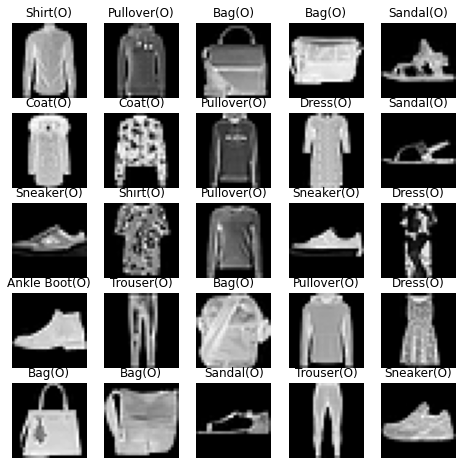

In [13]:
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_data))
    input_img = test_data[data_idx][0].unsqueeze(dim=0).to(device) 
    '''
    unsqueeze()를 통해 입력 이미지의 shape을 (1, 28, 28)에서 (1, 1, 28, 28)로 변환. 
    모델에 들어가는 입력 이미지의 shape은 (batch_size, channel, width, height) 되어야 함에 주의하세요!
    '''
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = labels_map[argmax.item()]
    label = labels_map[test_data[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + '(O)')
    else:
        plt.title(pred + '(X)' + ' / ' + label)
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap='gray')
    plt.axis('off')
model.train()
plt.show()